In [1]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
wa_path = '/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/usdm/WA/'
dates = ['20000104', '20080212', '20220208']
wa_files = [f'{wa_path}/USDM_{date}.nc' for date in dates]

Read the three files as a list of separate xarray datasets and display

[]

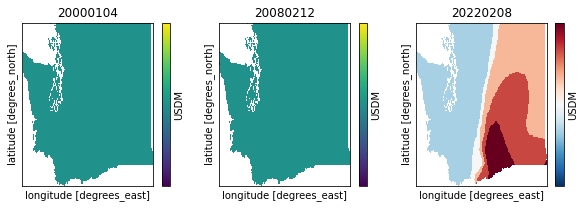

In [3]:
ds_list = []
fig, axes = plt.subplots(ncols=len(dates), figsize=(10, 3))
for i, wa_file in enumerate(wa_files):
    ds_list.append(xr.open_dataset(wa_file))
    ds_list[-1]['USDM'].isel(band=0).plot(ax=axes[i])
    axes[i].title.set_text(dates[i])
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

Read them again, but now as a single xarray dataset. Note that `join='left'` uses the indices of the first file to do the merge

[]

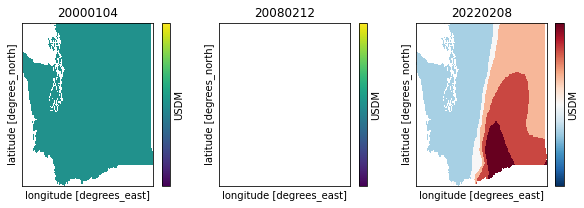

In [4]:
fig, axes = plt.subplots(ncols=len(dates), figsize=(10, 3))
ds_all = xr.open_mfdataset(wa_files, combine='nested', concat_dim='band', join='left')
for i, date in enumerate(dates):
    ds_all['USDM'].isel(band=i).plot(ax=axes[i])
    axes[i].title.set_text(date)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

For some reason the `20080212` is empty. Even though it does contain values. This implies a problem with the merge in `open_mfdataset`. If we reorder the dates and use `20080212` as the first file, then the other two are empty

[]

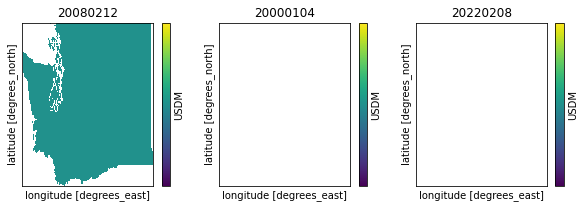

In [5]:
dates = ['20080212', '20000104', '20220208']
wa_files = [f'{wa_path}/USDM_{date}.nc' for date in dates]

fig, axes = plt.subplots(ncols=len(dates), figsize=(10, 3))
ds_all = xr.open_mfdataset(wa_files, combine='nested', concat_dim='band', join='left')
for i, date in enumerate(dates):
    ds_all['USDM'].isel(band=i).plot(ax=axes[i])
    axes[i].title.set_text(date)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

So far I have been unable to find what is different in the indexes. One way to force the same indexes is to use `join=override`, which imposes the indexes from the first file on the other ones.

[]

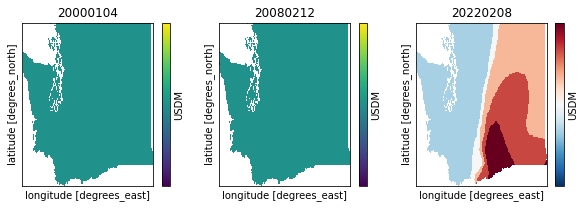

In [6]:
dates = ['20000104', '20080212', '20220208']
wa_files = [f'{wa_path}/USDM_{date}.nc' for date in dates]

fig, axes = plt.subplots(ncols=len(dates), figsize=(10, 3))
ds_all = xr.open_mfdataset(wa_files, combine='nested', concat_dim='band', join='override')
for i, date in enumerate(dates):
    ds_all['USDM'].isel(band=i).plot(ax=axes[i])
    axes[i].title.set_text(date)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])